In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold

In [3]:
data = pd.read_csv('breast_cancer_bd.csv')

In [4]:
x = data.drop(['Sample code number', 'Class'], axis = 1)
y = data['Class']

In [5]:
print (x)
print (y)

     Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                  5                        1                         1   
1                  5                        4                         4   
2                  3                        1                         1   
3                  6                        8                         8   
4                  4                        1                         1   
..               ...                      ...                       ...   
694                3                        1                         1   
695                2                        1                         1   
696                5                       10                        10   
697                4                        8                         6   
698                4                        8                         8   

     Marginal Adhesion  Single Epithelial Cell Size Bare Nuclei  \
0                    1          

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0, stratify = y)

In [7]:
x_train = x_train.apply(pd.to_numeric, errors='coerce')
x_test = x_test.apply(pd.to_numeric, errors='coerce')

In [16]:
clean_pipe = Pipeline([
     # Replaces NaN with medians
    ('imputer', SimpleImputer(strategy='median')),  
    # Drops useless constant columns
    ('variance_filter', VarianceThreshold(threshold=0.01)),
    # Normalizes features
    ('scaler', StandardScaler()), 

    ('lr', LogisticRegression(random_state = 0, max_iter = 1000))
])

In [17]:
clean_pipe.fit(x_train, y_train)

,steps,"[('imputer', ...), ('variance_filter', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,threshold,0.01


In [18]:
y_pred = clean_pipe.predict(x_test)

In [25]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign (2)', 'Malignant (4)']))
 
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.981
Classification Report:
               precision    recall  f1-score   support

   Benign (2)       0.99      0.98      0.99       138
Malignant (4)       0.96      0.99      0.97        72

     accuracy                           0.98       210
    macro avg       0.98      0.98      0.98       210
 weighted avg       0.98      0.98      0.98       210

Confusion Matrix:
[[135   3]
 [  1  71]]


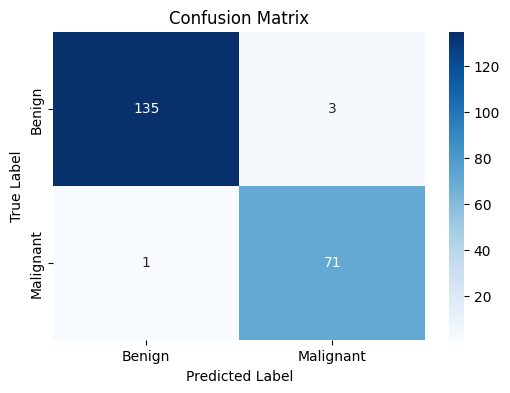

In [26]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Benign', 'Malignant'], 
            yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()